# IMDB dataset importing

In [1]:
# Libraries importing
from keras.datasets import imdb
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 4000)
# num_words = dictionnary len

In [3]:
for i in range(5) :
    print(len(x_train[i]))

218
189
141
550
147


In [4]:
# 0 = pad token
# 1 = beginning character of the review
# 2 = words that aren't in the dictionnary : "oov_char" parameter

# Review 123 decoding

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, '') for i in x_train[123]])
decoded_review

' beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to  on and rate it so other would enjoy too'

# Dataset processing

In [ ]:
# Definition of the review structure in 200 characters
x_train_padded = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen = 200)
x_test_padded = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen = 200)

In [ ]:
x_train_padded.shape, x_test_padded.shape

((25000, 200), (25000, 200))

In [ ]:
x_train_padded[0][0]

5

In [ ]:
# Defining validation and test data
x_data_val, y_data_val = x_test_padded[:int(len(x_test_padded)/2)], y_test[:int(len(x_test_padded)/2)]
x_data_test, y_data_test = x_test_padded[int(len(x_test_padded)/2):], y_test[int(len(x_test_padded)/2):]

In [10]:
x_data_val.shape, x_data_test.shape

((12500, 200), (12500, 200))

# Definition of the model

In [11]:
# Libraries importing
from keras.layers import Input, Embedding, Flatten, Dense, Dropout
from keras.models import Model
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

In [ ]:
input_layer = Input(shape = [200,], dtype = 'int64')

embedding_layer = Embedding(input_dim = 4000, input_length = 200, output_dim = 64)(input_layer)

flatten_layer = Flatten()(embedding_layer)

dense_layer1 = Dense(16, activation = "relu")(flatten_layer)

dropout_layer = Dropout(0.5)(dense_layer1)

output_layer = Dense(1, activation = "sigmoid")(dropout_layer)

model = Model(inputs = input_layer, outputs = output_layer)

model.compile(optimizer = Adam(), loss = BinaryCrossentropy(), metrics = [BinaryAccuracy()])

# Model fitting
history = model.fit(x_train_padded, y_train, batch_size = 32, epochs = 5, validation_data = (x_data_val, y_data_val))

Epoch 1/5


c:\Users\natha\Documents\GitHub\4th-year-Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - binary_accuracy: 0.6641 - loss: 0.5821 - val_binary_accuracy: 0.8230 - val_loss: 0.3841
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9068 - loss: 0.2540 - val_binary_accuracy: 0.8457 - val_loss: 0.3548
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9618 - loss: 0.1298 - val_binary_accuracy: 0.8541 - val_loss: 0.4168
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9847 - loss: 0.0642 - val_binary_accuracy: 0.8423 - val_loss: 0.5918
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9932 - loss: 0.0347 - val_binary_accuracy: 0.8426 - val_loss: 0.6430


In [22]:
plot_model(model, to_file = "IMDB_model.png", show_shapes = True);

# Displaying the training results

In [14]:
# Libraries importing
import pandas as pd

In [15]:
df_curve = pd.DataFrame(history.history)
df_curve_loss = df_curve[["loss", "val_loss"]]
df_curve_acc = df_curve[["binary_accuracy", "val_binary_accuracy"]]

<Axes: >

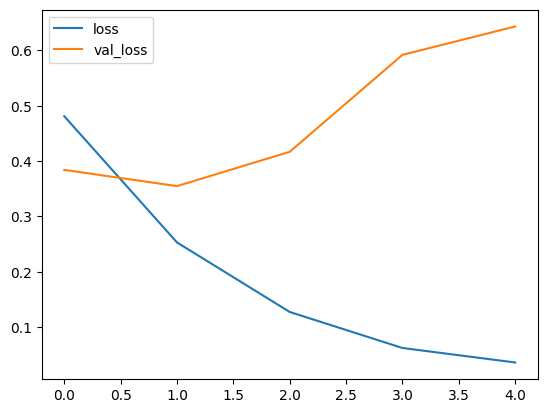

In [16]:
df_curve_loss.plot()

<Axes: >

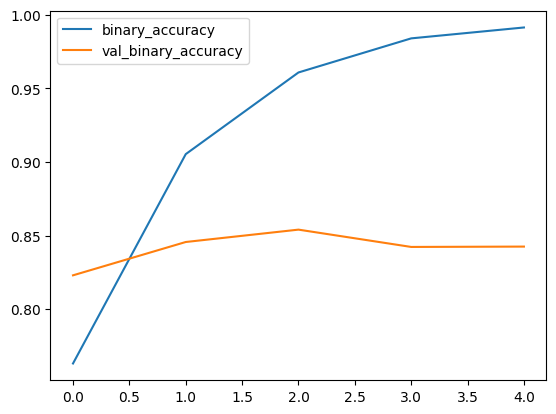

In [17]:
df_curve_acc.plot()

# Testing the model with test data

In [18]:
model.evaluate(x_data_test, y_data_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - binary_accuracy: 0.8480 - loss: 0.6243


[0.6109572052955627, 0.8471999764442444]

# Prediction with test data

In [19]:
import numpy as np

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def review_decoder(encoded_reviews) :
    decoded_reviews = encoded_reviews.copy()
    for i in range (len(encoded_reviews)) :
        decoded_reviews[i] = " ".join([reverse_word_index.get(j - 3, '') for j in decoded_reviews[i]])
    return decoded_reviews

In [ ]:
x_test_decoded = review_decoder(x_test)

TypeError: array() missing required argument 'object' (pos 0)

In [ ]:
x_test_decoded[0]

In [ ]:
model.predict(x_test_padded[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[0.10126379]], dtype=float32)

In [ ]:
y_test[0]

0